# 6.6. Creating plots with Altair and the Vega-Lite specification

In [1]:
import altair as alt

In [2]:
alt.list_datasets()

['7zip',
 'airports',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'weather',
 'weball26',
 'wheat',
 'world-110m',
 'zipcodes']

In [3]:
df = alt.load_dataset('flights-5k')

In [4]:
df.head(3)

,date,delay,destination,distance,origin
0,2001-01-10 18:20:00,25,HOU,192,SAT
1,2001-01-31 16:45:00,17,OAK,371,SNA
2,2001-02-16 12:07:00,21,SAN,417,SJC


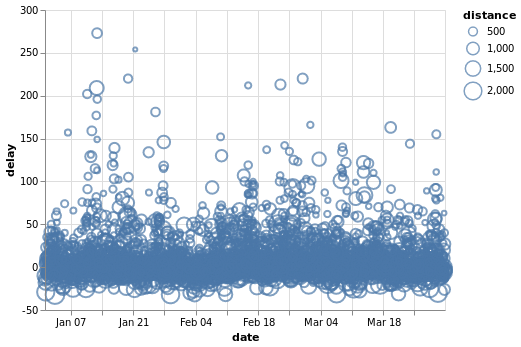

In [5]:
alt.Chart(df).mark_point().encode(
    x='date',
    y='delay',
    size='distance',
)

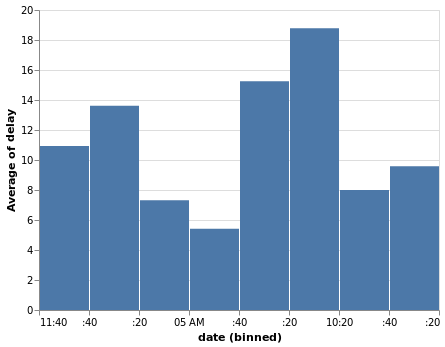

In [6]:
df_la = df[df['origin'] == 'LAX']

x = alt.X('date', bin=True)
y = 'average(delay)'

alt.Chart(df_la).mark_bar().encode(
    x=x,
    y=y,
)

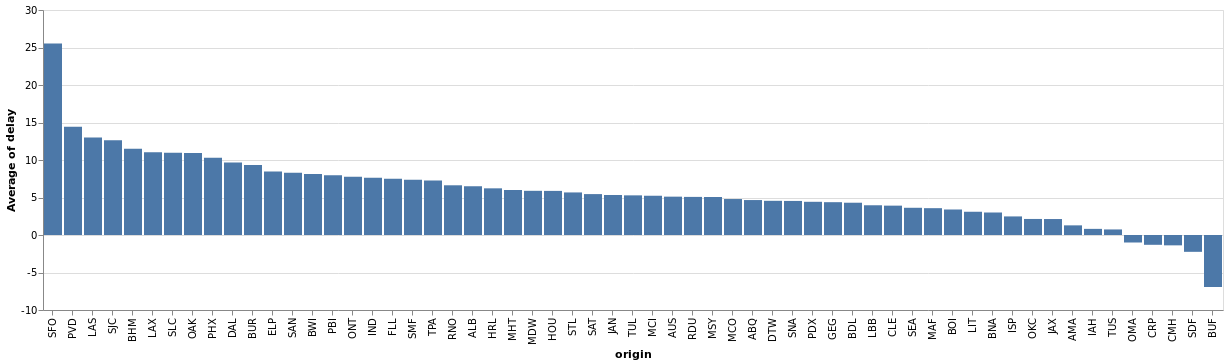

In [8]:
sort_delay = alt.EncodingSortField(
    'delay', op='average', order='descending')

x = alt.X('origin', sort=sort_delay)
y = 'average(delay)'

alt.Chart(df).mark_bar().encode(
    x=x,
    y=y,
)

```json
{
 "$schema": "https://vega.github.io/schema/vega-lite/v1.2.1.json",
 "data": {
  "values": [
   {
    "date": "2001-01-10 18:20:00",
    "delay": 25,
    "destination": "HOU",
    "distance": 192,
    "origin": "SAT"
   },
   ...
  ]
 },
 "encoding": {
  "x": {
   "field": "origin",
   "sort": {
    "field": "delay",
    "op": "average",
    "order": "descending"
   },
   "type": "nominal"
  },
  "y": {
   "aggregate": "average",
   "field": "delay",
   "type": "quantitative"
  }
 },
 "mark": "bar"
}
```